In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)
import numpy as np



In [5]:
master_data_path = "/Users/sagardhal/Desktop/Practice/personal-stock/results/predictions_20250908_092155.parquet"   # example


if master_data_path.endswith(".csv"):
    df = pd.read_csv(predictions_path)
elif master_data_path.endswith(".parquet"):
    df = pd.read_parquet(predictions_path)
else:
    raise ValueError("Unsupported file format for predictions")


print("Mater Data loaded:", df.shape)

master_df = df.copy()
master_df.head()

Mater Data loaded: (1372264, 642)


,Date,Open,High,Low,Close,adj_close,Volume,Ticker,year,month,...,pred14_rf_thresh_90,pred15_rf_auto_rate_1p,pred15_rf_auto_rate_3p,pred15_rf_auto_rate_5p,pred30_top3_daily,pred30_top5_daily,pred30_top10_daily,pred20_ens_ml50_and_momentum,pred21_ens_auto1p_or_top3,pred22_ens_manual2plus_and_auto3p
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.840094,535796800.0,AAPL,2000,1,...,0,0,0,0,1,1,1,1,1,0
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.769266,512377600.0,AAPL,2000,1,...,0,0,0,0,1,1,1,1,1,0
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.780523,778321600.0,AAPL,2000,1,...,0,0,0,0,1,1,1,1,1,0
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.712978,767972800.0,AAPL,2000,1,...,0,0,0,0,1,1,1,1,1,0
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.746750,460734400.0,AAPL,2000,1,...,0,0,0,0,1,1,1,1,1,0


In [7]:
daily_preds_path = "/Users/sagardhal/Desktop/Practice/personal-stock/new_pred_logs/predictions_top2_asof_2025-09-12.csv"   # example


if daily_preds_path.endswith(".csv"):
    df = pd.read_csv(daily_preds_path)
elif daily_preds_path.endswith(".parquet"):
    df = pd.read_parquet(daily_preds_path)
else:
    raise ValueError("Unsupported file format for predictions")


print("Mater Data loaded:", df.shape)

daily_preds_df = df.copy()
daily_preds_df.head()

Mater Data loaded: (250, 8)


,rank_today,Date,Ticker,Close,rf_prob_30d,signal_top2,vote_share_top2,strength_top2
0,1,2025-09-12,KVUE,18.990000,0.523272,0,0.0,WEAK
1,2,2025-09-12,AMT,195.080002,0.520900,0,0.0,WEAK
2,3,2025-09-12,BMY,46.200001,0.520504,0,0.0,WEAK
3,4,2025-09-12,PFE,23.870001,0.520420,0,0.0,WEAK
4,5,2025-09-12,KDP,27.230000,0.520030,0,0.0,WEAK


KS statistic: 0.9571, p-value: 0.00e+00


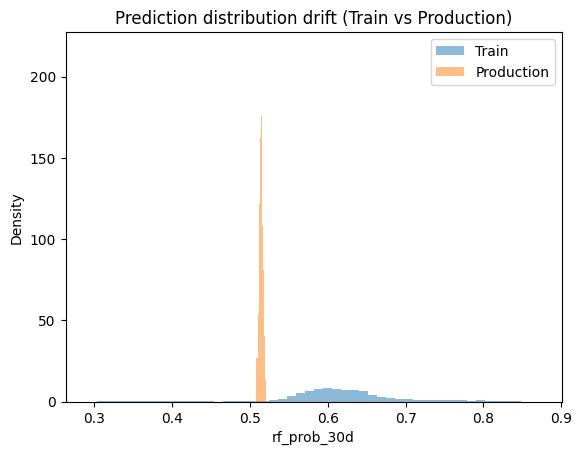

In [10]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# --- 1) restrict baseline to training split ---
baseline = master_df.loc[master_df["split"] == "train", "rf_prob_30d"].dropna()
current  = daily_preds_df["rf_prob_30d"].dropna()

# --- 2) KS test ---
stat, pval = ks_2samp(baseline, current)
print(f"KS statistic: {stat:.4f}, p-value: {pval:.2e}")

# --- 3) visualize distributions ---
plt.hist(baseline, bins=50, alpha=0.5, label="Train", density=True)
plt.hist(current, bins=50, alpha=0.5, label="Production", density=True)
plt.legend()
plt.xlabel("rf_prob_30d")
plt.ylabel("Density")
plt.title("Prediction distribution drift (Train vs Production)")
plt.show()


In [11]:
train_stats = master_df[master_df["split"]=="train"].describe().T
prod_stats  = daily_preds_df.describe().T


/Users/sagardhal/Desktop/Practice/personal-stock/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [22]:
train_stats.loc["rf_prob_30d"]

count    904317.0
mean     0.617995
min      0.292335
25%      0.582272
50%      0.612894
75%      0.648318
max      0.871493
std      0.070911
Name: rf_prob_30d, dtype: object

In [21]:
prod_stats.loc["rf_prob_30d"]

count    250.000000
mean       0.514478
std        0.002532
min        0.508496
25%        0.512827
50%        0.514294
75%        0.516089
max        0.523272
Name: rf_prob_30d, dtype: float64